# Lab Segmentation 1

In [96]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(853, 1280, 3)


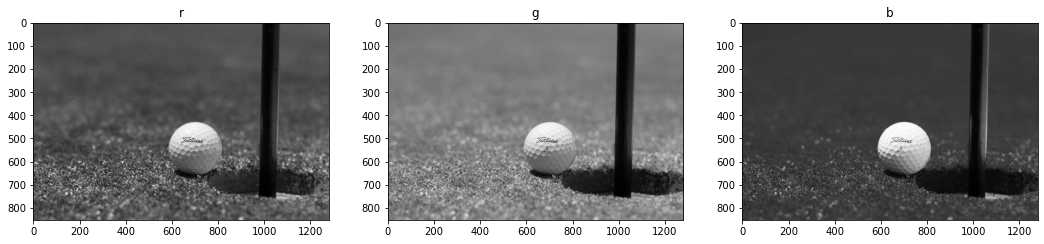

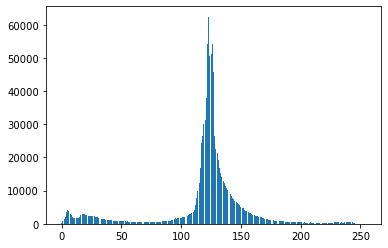

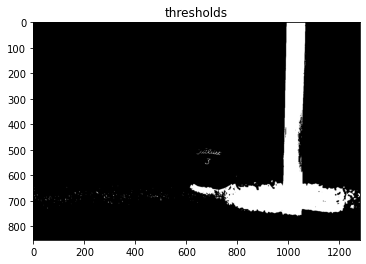

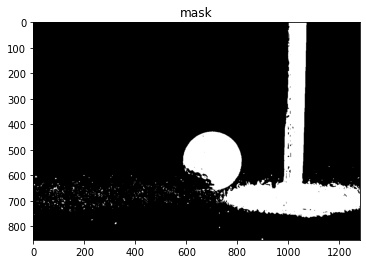

In [97]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf

img = io.imread('imgs/exp1/golf.jpeg').astype(float)
print(img.shape)

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]


# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
show_images([r, g, b], ["r", "g", "b"])
# green is the highest

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
showHist(g)
Threshold=50

new_g = np.copy(g)
new_g[g < Threshold] = 255
new_g[g >= Threshold] = 0

show_images([new_g], ["thresholds"])
# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
mask = np.ones(g.shape)
mask[(g > r) & (g > b)] = 0

# 6- display the binarized image
show_images([mask], ["mask"])





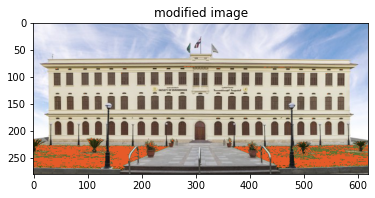

In [98]:
# 1- Get the required RGB color (Using a color picker)
r_value = 65
g_value = 91
b_value = 30

# 2- Read image
img = io.imread('imgs/exp2/cufe.png').astype(float)

# 3- extract R, G and B channels (as float)
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
diff_r = r - r_value
diff_g = g - g_value
diff_b = b - b_value

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
sq_r = diff_r**2
sq_g = diff_g**2
sq_b = diff_b**2

dist = (sq_r + sq_g + sq_b)**(1/2)

# 6-  create a mask by thresholding the differences
mask = np.ones(dist.shape)
T = 30
mask[dist > T] = 0
# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
r[mask == 1] = 230

g[mask == 1] = 90
b[mask == 1] = 40

img[:,:,0] = r
img[:,:,1] = g
img[:,:,2] = b

img = img.astype(np.uint8)
# 8- show the image or save it
show_images([img], ["modified image"])
